<a href="https://colab.research.google.com/github/Ark1645/Deep-Learning/blob/main/cub_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d wenewone/cub2002011

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!ls

drive  sample_data


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.applications import ResNet50
import cv2
import os
import matplotlib.pylab as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import floor
import random


In [4]:
img_width = 64
img_height = 64
batch_size = 64

In [5]:
p="/content/drive/MyDrive/Machine_Learning_Datas/CUB_200_2011/images"

In [6]:
f = open('/content/drive/MyDrive/Machine_Learning_Datas/CUB_200_2011/classes.txt', 'r')
labels_dict={}
for line in f:
    v,_ = line.split('.')
    k=line
    labels_dict[k.strip()] = int(v.strip())

f.close()

In [7]:
labels_dict

{'001.Black_footed_Albatross': 1,
 '002.Laysan_Albatross': 2,
 '003.Sooty_Albatross': 3,
 '004.Groove_billed_Ani': 4,
 '005.Crested_Auklet': 5,
 '006.Least_Auklet': 6,
 '007.Parakeet_Auklet': 7,
 '008.Rhinoceros_Auklet': 8,
 '009.Brewer_Blackbird': 9,
 '010.Red_winged_Blackbird': 10,
 '011.Rusty_Blackbird': 11,
 '012.Yellow_headed_Blackbird': 12,
 '013.Bobolink': 13,
 '014.Indigo_Bunting': 14,
 '015.Lazuli_Bunting': 15,
 '016.Painted_Bunting': 16,
 '017.Cardinal': 17,
 '018.Spotted_Catbird': 18,
 '019.Gray_Catbird': 19,
 '020.Yellow_breasted_Chat': 20,
 '021.Eastern_Towhee': 21,
 '022.Chuck_will_Widow': 22,
 '023.Brandt_Cormorant': 23,
 '024.Red_faced_Cormorant': 24,
 '025.Pelagic_Cormorant': 25,
 '026.Bronzed_Cowbird': 26,
 '027.Shiny_Cowbird': 27,
 '028.Brown_Creeper': 28,
 '029.American_Crow': 29,
 '030.Fish_Crow': 30,
 '031.Black_billed_Cuckoo': 31,
 '032.Mangrove_Cuckoo': 32,
 '033.Yellow_billed_Cuckoo': 33,
 '034.Gray_crowned_Rosy_Finch': 34,
 '035.Purple_Finch': 35,
 '036.Northe

In [8]:
data_path='/content/drive/MyDrive/Machine_Learning_Datas/Birds dataset/CUB_200_2011/images'

In [9]:
def prefucn(image):
    image = tf.image.resize(image, (64,64))
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=1 - 0.2, upper=1 + 0.2)
    image = tf.image.random_saturation(image, lower=1 - 0.2, upper=1 + 0.2)
    image = tf.image.random_hue(image, max_delta=0.2)
    return image

In [10]:
train_datagen = ImageDataGenerator(preprocessing_function=prefucn,
    rescale=1/255,
     validation_split=0.125
    )

In [11]:
train_generator = train_datagen.flow_from_directory(
    p,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 10405 images belonging to 200 classes.


In [12]:
validation_generator = train_datagen.flow_from_directory(
    p,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 1383 images belonging to 200 classes.


In [13]:
IMAGE_SIZE=[64,64]

In [14]:
from tensorflow.keras import layers, models

In [ ]:
res=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
for layer in res.layers:
  layers.trainable=False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
res = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze some layers for transfer learning
for layer in res.layers[:100]:  # Freeze the first 100 layers
    layer.trainable = False

In [ ]:
model = Sequential()
#model.add(ResNet50(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False))
model.add(res)
model.add(layers.GlobalAveragePooling2D())
model.add(Dense(200, activation='softmax'))

In [15]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras import regularizers

In [16]:
model=Sequential()
#model.add(res)  # Assuming 'res' is your pre-trained model (if applicable)
model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = [2,2]))

model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = [1,1]))

model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = [1,1]))

#model.add(GlobalAveragePooling2D())  # Added GAP layer

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(200, activation = 'softmax'))
#model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [17]:
print('Model Created')
model.summary()


Model Created
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                     

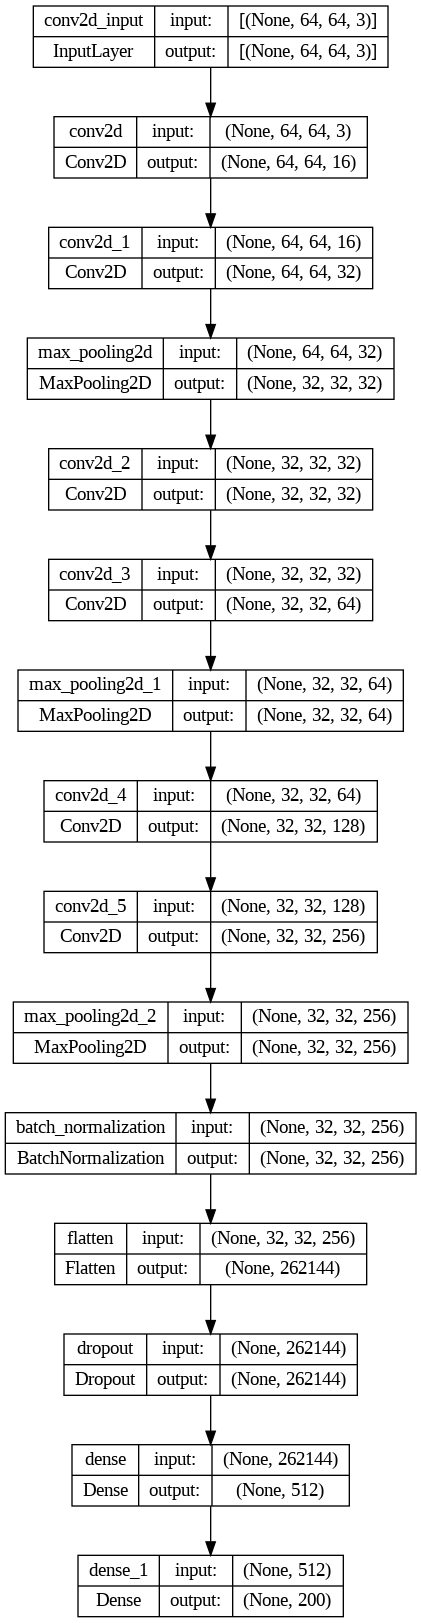

In [19]:
import keras
keras.utils.plot_model(model, show_shapes=True)

In [20]:
model.compile(optimizer='adam',loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
import keras
from keras.callbacks import ModelCheckpoint


model_path = '/content/callback_cub/horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    epochs = 150,
    callbacks=callbacks_list
    )

Epoch 1/150
  1/162 [..............................] - ETA: 2:19:20 - loss: 6.4350 - accuracy: 0.0000e+00

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    epochs=150,
)

Epoch 1/150


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-119-b9d0f8e8768e>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [64,200] and labels shape [12800]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_283551]

In [ ]:
import os
file_names = os.listdir('/content/CUB_200_2011/images')
print(file_names)

In [ ]:
loss, accuracy = model.evaluate(train_generator)
print('training loss:', loss)
print('training accuracy:', accuracy)

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

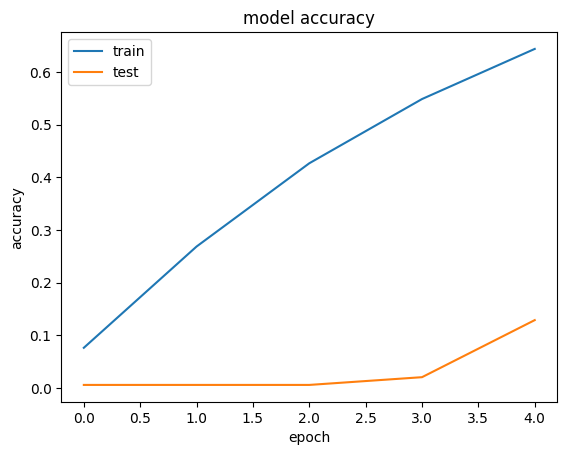

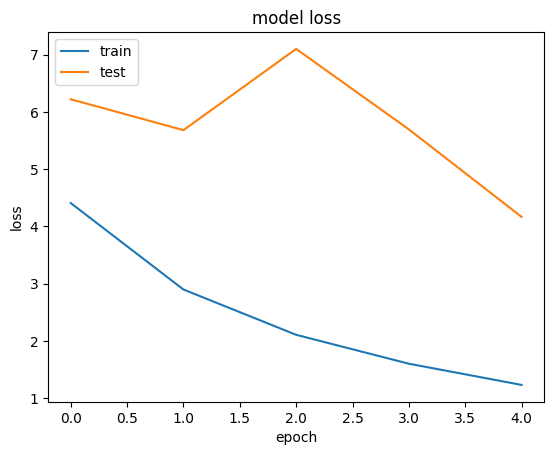

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("/content/drive/CUBDATASET")